In [1]:
import pandas as pd
fileHead = 'C:/Users/xyttttt/Desktop'
goodsPromotePrice = pd.read_csv(fileHead+'/goods_promote_price.csv',encoding='utf8')
goodsSkuRelation = pd.read_csv(fileHead+'/goods_sku_relation.csv',encoding='utf8')
goodsDaily = pd.read_csv(fileHead+'/goodsdaily.csv',encoding='utf8')
goodsInfo = pd.read_csv(fileHead+'/goodsinfo.csv',encoding='utf8')
marketing = pd.read_csv(fileHead+'/marketing.csv',encoding='utf8')
submit = pd.read_csv(fileHead+'/submit_example.csv',encoding='utf8')
allDataDate=[]
days = [31,28,31,30,31,30,31,31,30,31,30,31]
for y in [2017,2018]:
    for m in range(1,13):
        for d in range(1,days[m-1]+1):
            allDataDate.append(int(str(y)+('0'+str(m))[-2:]+('0'+str(d))[-2:]))
allDataDate = allDataDate[59:440]
allDate = {}
for date in allDataDate:
    allDate[date] = allDataDate.index(date)
allDate = pd.DataFrame({'data_date':list(allDate.keys()),'day_num':list(allDate.values())})
allDate['data_date'] = allDate['data_date'].astype('int')
allDate['day_num'] = allDate['day_num'].astype('int')

goodsDate = pd.DataFrame({'data_date':goodsDaily.data_date,'goods_id':goodsDaily.goods_id,'onsale_days':goodsDaily.onsale_days})
goodsDate = goodsDate.drop_duplicates('goods_id')
goodsDate = pd.merge(goodsDate, allDate, on='data_date',how='left')
goodsDate['market_day'] = goodsDate.day_num-goodsDate.onsale_days
goodsDate.loc[goodsDate.market_day<0,'market_day'] = 0
goodsDate = pd.merge(goodsDate, pd.DataFrame({'market_day':allDate.day_num,'market_date':allDate.data_date}),on='market_day',how='left')
goodsDate = pd.merge(goodsDate, goodsSkuRelation, on='goods_id',how='left')
goodsDate = goodsDate.drop(['data_date','day_num','market_day'],axis=1)

ddddffff = pd.merge(submit, goodsDate, on='sku_id',how='left')

ddddffff.to_csv('C:/Users/xyttttt/Desktop/market_day.csv',index = False)
print(1)

1


In [47]:
allDataDate=[]
days = [31,28,31,30,31,30,31,31,30,31,30,31]
for y in [2017,2018]:
    for m in range(1,13):
        for d in range(1,days[m-1]+1):
            allDataDate.append(int(str(y)+('0'+str(m))[-2:]+('0'+str(d))[-2:]))
allDataDate = allDataDate[59:440]
allDate = {}
for date in allDataDate:
    allDate[date] = allDataDate.index(date)
allDate = pd.DataFrame({'data_date':list(allDate.keys()),'day_num':list(allDate.values())})
allDate['data_date'] = allDate['data_date'].astype('int')
allDate['day_num'] = allDate['day_num'].astype('int')
print(allDate)

     data_date  day_num
0     20170301        0
1     20170302        1
2     20170303        2
3     20170304        3
4     20170305        4
5     20170306        5
6     20170307        6
7     20170308        7
8     20170309        8
9     20170310        9
10    20170311       10
11    20170312       11
12    20170313       12
13    20170314       13
14    20170315       14
15    20170316       15
16    20170317       16
17    20170318       17
18    20170319       18
19    20170320       19
20    20170321       20
21    20170322       21
22    20170323       22
23    20170324       23
24    20170325       24
25    20170326       25
26    20170327       26
27    20170328       27
28    20170329       28
29    20170330       29
..         ...      ...
351   20180215      351
352   20180216      352
353   20180217      353
354   20180218      354
355   20180219      355
356   20180220      356
357   20180221      357
358   20180222      358
359   20180223      359
360   20180224  

In [69]:
goodsDate = pd.DataFrame({'data_date':goodsDaily.data_date,'goods_id':goodsDaily.goods_id,'onsale_days':goodsDaily.onsale_days})
goodsDate = goodsDate.drop_duplicates('goods_id')
goodsDate = pd.merge(goodsDate, allDate, on='data_date',how='left')
goodsDate['market_day'] = goodsDate.day_num-goodsDate.onsale_days
goodsDate.loc[goodsDate.market_day<0,'market_day'] = 0
goodsDate = pd.merge(goodsDate, pd.DataFrame({'market_day':allDate.day_num,'market_date':allDate.data_date}),on='market_day',how='left')
goodsDate = pd.merge(goodsDate, goodsSkuRelation, on='goods_id',how='left')
goodsDate = goodsDate.drop(['data_date','day_num','market_day'],axis=1)
goodsDate[goodsDate.market_date==20170301]

,goods_id,onsale_days,market_date,sku_id
10,Gjytr2,336,20170301,SK1x4A07
11,Gjytr2,336,20170301,SK14r08c
12,Gjytr2,336,20170301,SKI23bfo
13,Gjytr2,336,20170301,SKtIAxV1
29,G9HciW,681,20170301,SK9QkCD0
30,G9HciW,681,20170301,SKquCNi6
31,G9HciW,681,20170301,SKlhMgEG
32,G9HciW,681,20170301,SKWiBG3s
69,Glbd0Y,177,20170301,SKA5vWk7
70,Glbd0Y,177,20170301,SKyxcm3A


In [42]:
ddddffff = pd.merge(submit, goodsDate, on='sku_id',how='left')
goodsale=pd.read_csv('C:/Users/lenovo/Desktop/dataset/goodsale.csv',low_memory=False)
print(1)

1


In [3]:
#ddddffff[ddddffff.market_date==20180315]
from tqdm import tqdm
row=0
sku=[]
for i in ddddffff['market_date']:
    row+=1
    if i>=20170417:
        if i<=20170425:
            act3=ddddffff.ix[row-1]
            sku_id=act3.sku_id
            good=act3.goods_id
            dfdf=goodsInfo.loc[goodsInfo['goods_id']==good]
            sea=dfdf.goods_season.item()
            if sea==0:
                sku.append(sku_id)
print(1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


1


In [64]:
sku=sku[0:100]
lll=sku[1:100]
lll

['SKgyu1nJ',
 'SKYJ2pGA',
 'SKO8SwsT',
 'SK1MqayF',
 'SKe8A54m',
 'SK18Tih9',
 'SKIBq9bO',
 'SKjSt06k',
 'SK9ZXTUg',
 'SKOY1m8c',
 'SK4Vgcmj',
 'SKjrF2ms',
 'SKs1hO0K',
 'SKkrohcP',
 'SK4pESKg',
 'SKd7xViQ',
 'SK7lvqOf',
 'SKCTUmx8',
 'SKeExIXV',
 'SKqu9wBs',
 'SKNGA8sZ',
 'SKaS1f2t',
 'SKFBU7dE',
 'SKosp9Se',
 'SKBWr5SP',
 'SKQVABfG',
 'SKV4op7L',
 'SKby4xhI',
 'SKTZ8BmW',
 'SKBAYIl6',
 'SK3V6Gpq',
 'SKIW34EK',
 'SKpTodfr',
 'SKMuiARS',
 'SKPqr8M6',
 'SKQNI5p9',
 'SKGDOAnV',
 'SKF3mXTf',
 'SKqUtiSf',
 'SKuRVKIF',
 'SKSe39PD',
 'SKCs6Ux9',
 'SK0nJQI1',
 'SKxeqTfk',
 'SKpuBgwY',
 'SKTZk4By',
 'SKrISKXR',
 'SKDkSEst',
 'SKE7aKji',
 'SKLyXEWp',
 'SKHvNdzO',
 'SKcgasCZ',
 'SKg1OCt3',
 'SKPiuQUk',
 'SKx1LISF',
 'SK9aLPFk',
 'SKLzVBcl',
 'SKOSH4uV',
 'SKXuGLtB',
 'SKzOsdI3',
 'SK5GMewV',
 'SKhJ8usa',
 'SKJOwRD6',
 'SKuZxqid',
 'SKjrWxCH',
 'SKqby8in',
 'SKjuI2pw',
 'SKArtlZJ',
 'SK3qG5gv',
 'SK0Dc14y',
 'SKUMh8EN',
 'SKR1Kc9t',
 'SKGIoVPj',
 'SKXaJFHv',
 'SKQPhDZJ',
 'SKpT2ly3',
 'SKu9tfVS',

In [1]:
import numpy as np
from tqdm import tqdm
t1=[]
t2=[]
for i in tqdm(sku):
    df1=goodsale.loc[goodsale['sku_id']==i].reset_index()
    total1=0
    total2=0
    jd=0
    ll=0
    for j in df1.data_date:
        ll+=1
        if j in range(20170522,20170626):
            jd=1
            df2=df1.iloc[ll-1]
            total1+=df2.goods_num
        if j in range(20171214,20171232):
            jd=1
            df2=df1.iloc[ll-1]
            total2+=df2.goods_num
    if jd==1:
        t1.append(total1)
        t2.append(total2)


NameError: name 'sku' is not defined

In [39]:
i='SKfi85Dm'
df1=goodsale.loc[goodsale['sku_id']==i].reset_index()
df1

,index,data_date,goods_id,sku_id,goods_num,goods_price,orginal_shop_price
0,273,20171007,GmjLif,SKfi85Dm,1,14.99,26.99
1,25521,20170512,GmjLif,SKfi85Dm,7,17.99,26.99
2,99830,20170804,GmjLif,SKfi85Dm,3,19.99,26.99
3,173775,20170617,GmjLif,SKfi85Dm,1,14.99,26.99
4,183727,20170603,GmjLif,SKfi85Dm,9,17.99,26.99
5,283021,20170704,GmjLif,SKfi85Dm,2,12.99,26.99
6,307068,20170628,GmjLif,SKfi85Dm,1,15.99,26.99
7,320222,20170608,GmjLif,SKfi85Dm,12,15.66,26.99
8,364901,20171113,GmjLif,SKfi85Dm,1,18.99,26.99
9,489777,20170526,GmjLif,SKfi85Dm,10,15.89,26.99


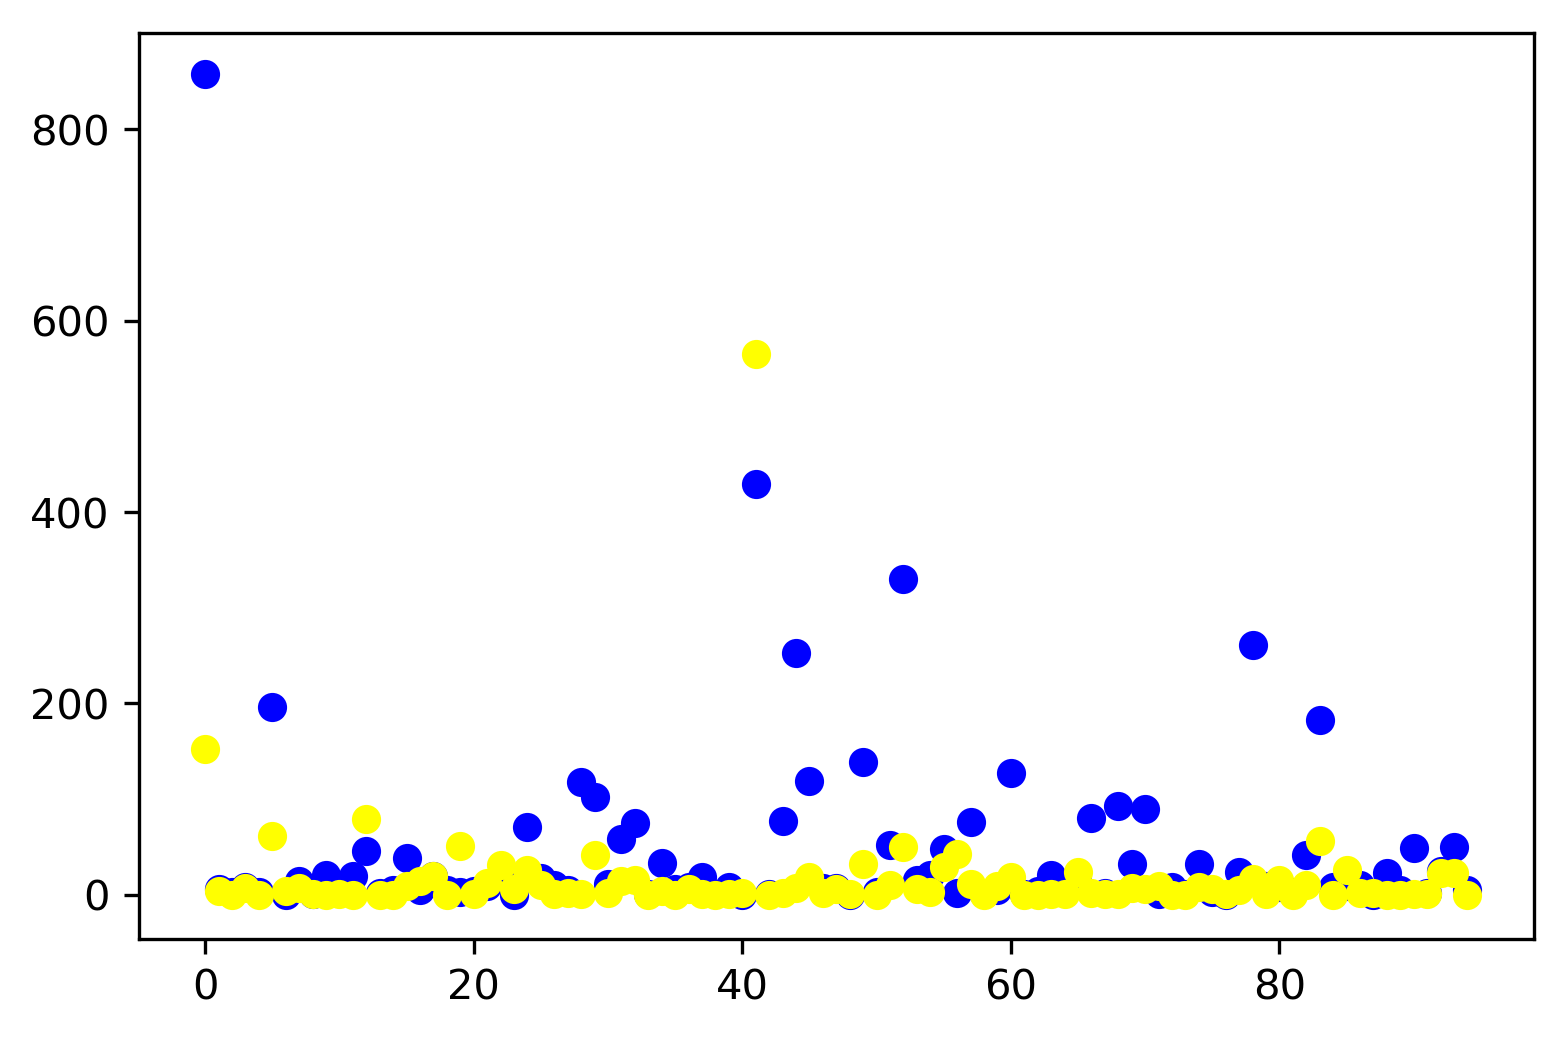

In [73]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
x=range(95)
plt.rcParams['figure.dpi'] = 300
plt.scatter(x,t1,color='blue')
plt.scatter(x,t2,color='yellow')